# Predicting presence/absence of Heart diseases using supervised machine learning

## Problem Definition

Heart disease is a leading cause of death and disability worldwide. It is characterized by the build-up of plaque in the coronary arteries, which can restrict blood flow to the heart and increase the risk of heart attack or stroke.

Predicting heart disease using machine learning can help healthcare professionals identify individuals at risk of developing heart disease and take preventive measures to reduce the risk. Machine learning algorithms can analyze various data points, such as medical history, demographic data, and lifestyle factors, to make predictions about an individual's likelihood of developing heart disease.

There are several approaches to predicting heart disease using machine learning. One approach is to use supervised learning, in which a machine learning model is trained on a dataset that includes labeled examples of individuals with and without heart disease. The model can then use this information to predict the likelihood of heart disease in new, unlabeled cases.

## Tools

In [ ]:
# Tools needed..
import numpy
import pandas
import seaborn
import matplotlib.pyplot
%matplotlib inline

In [ ]:
# Required models to be trained on the dataset.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Other tools for data prepartion and evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Data

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

### Attribute Information

```
age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.
```

In [ ]:
!wget https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv

--2022-12-23 04:33:13--  https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11024 (11K) [text/plain]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>]  10.77K  --.-KB/s    in 0s      

2022-12-23 04:33:13 (74.6 MB/s) - ‘dataset.csv’ saved [11024/11024]



In [ ]:
rawData = pandas.read_csv('dataset.csv')

## Exploration 

In [ ]:
rawData.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
143,67,0,0,106,223,0,1,142,0,0.3,2,2,2,1
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
199,65,1,0,110,248,0,0,158,0,0.6,2,2,1,0
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [ ]:
rawData.shape # shape of the table 

(303, 14)

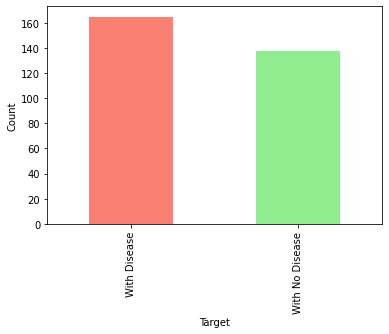

In [ ]:
# Let's visualize the target column based on the patient's status
plt1 = rawData['target'].value_counts().plot(kind='bar',color=['salmon','lightgreen'],xlabel='Target')
plt1.set_ylabel('Count')
plt1.set_xticklabels(('With Disease','With No Disease'));

In [ ]:
# Are there any columns with empty values
rawData.isna().value_counts() # No

age    sex    cp     trestbps  chol   fbs    restecg  thalach  exang  oldpeak  slope  ca     thal   target
False  False  False  False     False  False  False    False    False  False    False  False  False  False     303
dtype: int64

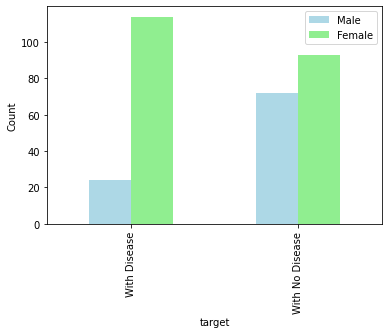

In [ ]:
# Graphing the column sex based on the column target
plt2 = pandas.crosstab(rawData.target,rawData.sex).plot(kind='bar',color=['lightblue','lightgreen'])
plt2.legend(['Male','Female'])
plt2.set_ylabel('Count')
plt2.set_xticklabels(('With No Disease','With  Disease'));

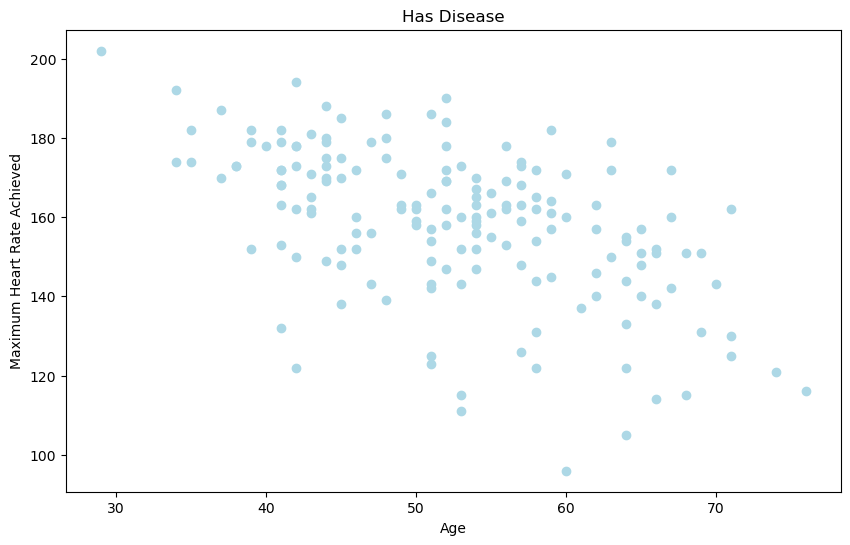

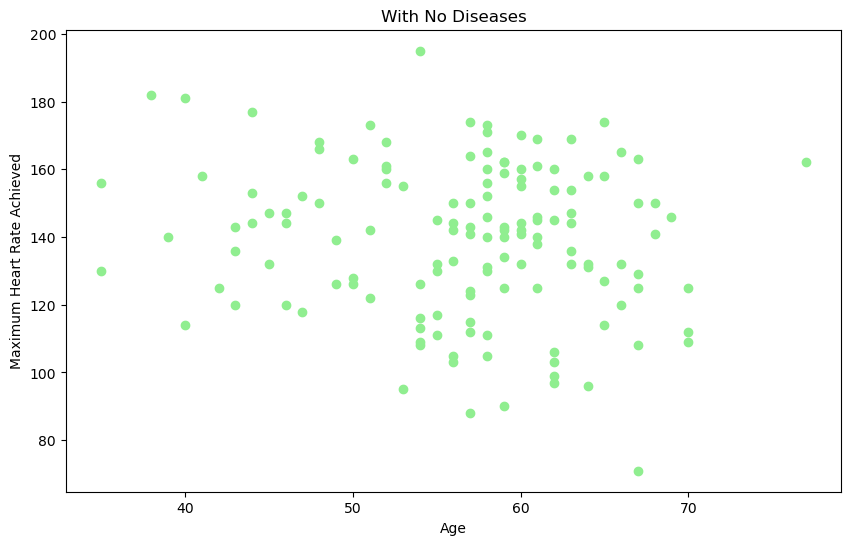

In [ ]:
# Age vs. Max Heart Rate for Hear Disease
matplotlib.pyplot.figure(figsize=(10,6))

matplotlib.pyplot.scatter(rawData.age[rawData.target==1],rawData.thalach[rawData.target==1],color='lightblue')
matplotlib.pyplot.ylabel('Maximum Heart Rate Achieved')
matplotlib.pyplot.xlabel('Age')
matplotlib.pyplot.title('Has Disease')
matplotlib.pyplot.show()

matplotlib.pyplot.figure(figsize=(10,6))

matplotlib.pyplot.scatter(rawData.age[rawData.target==0],rawData.thalach[rawData.target==0],color='lightgreen')
matplotlib.pyplot.ylabel('Maximum Heart Rate Achieved')
matplotlib.pyplot.xlabel('Age')
matplotlib.pyplot.title('With No Diseases')
matplotlib.pyplot.show()

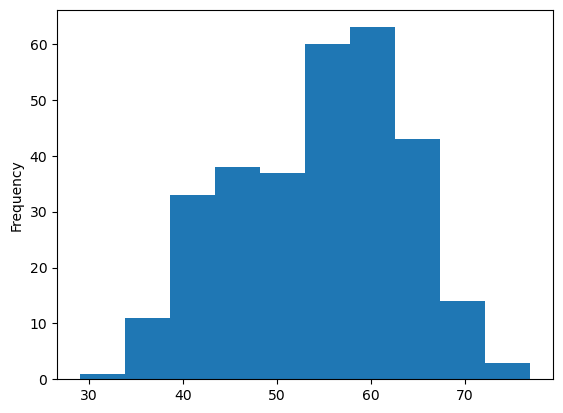

In [ ]:
# Let's find the distribution of age
rawData.age.plot.hist();

- Chest Pain Types
    - 0 Typical Angina : Chest Pain that occurs due to decrease in blood supply to the heart
    - 1 Atypical Angina : Chest pain not related to heart
    - 2 Non-anginal pain : Typically esophageal spasms
    - 3 Asymptomatic : Chest pains showing no symptoms of diseases

Text(0.5, 0, 'Chest Pain Type')

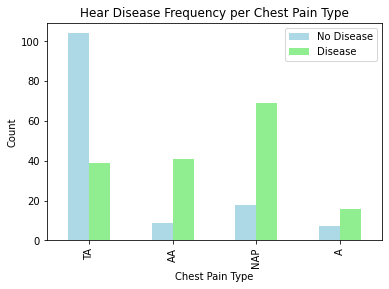

In [ ]:
# Visualizing chest pain type (4 values) based on target column
plt3 = pandas.crosstab(rawData.cp,rawData.target).plot(kind='bar',color=['lightblue','lightgreen'])
plt3.set_title('Hear Disease Frequency per Chest Pain Type')
plt3.legend(['No Disease','Disease'])
plt3.set_xticklabels(['TA','AA','NAP','A'])
plt3.set_ylabel('Count')
plt3.set_xlabel('Chest Pain Type')

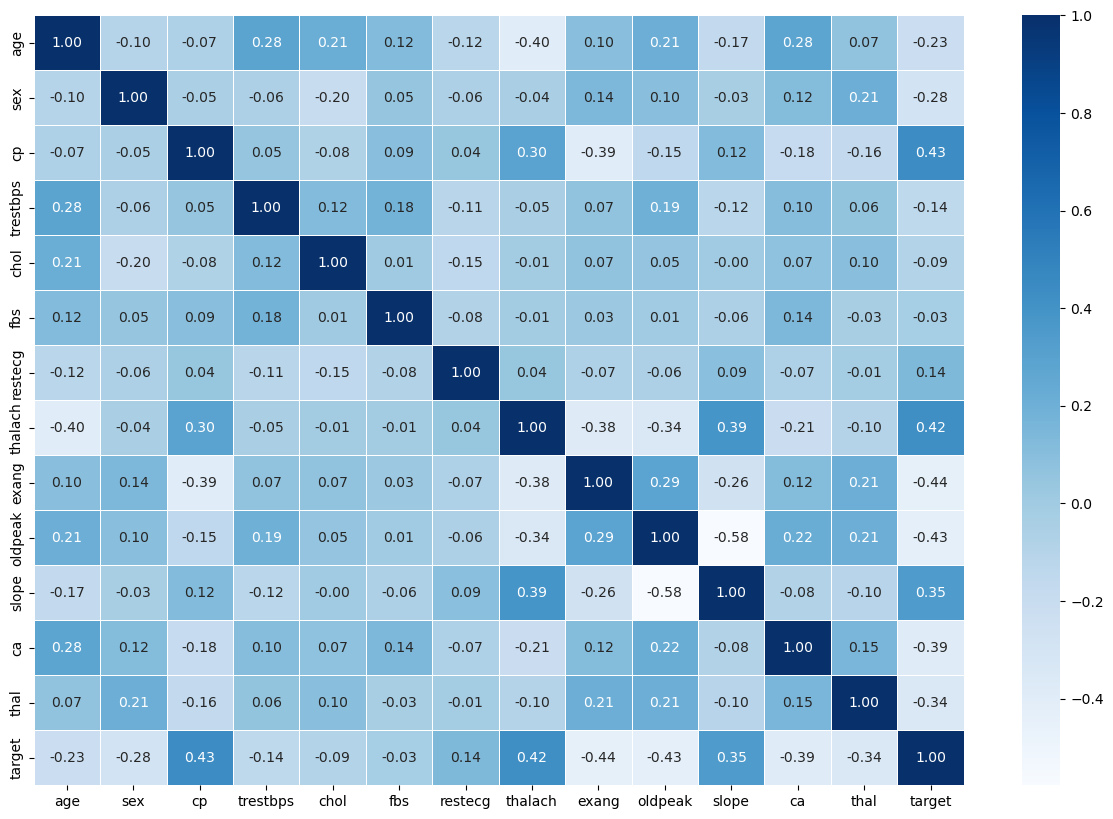

In [ ]:
# Let's create a correlation Matrix
corrMatrix = rawData.corr()

fig,ax = matplotlib.pyplot.subplots(figsize=(15,10))
ax = seaborn.heatmap(corrMatrix
                     ,annot=True
                     ,linewidths=0.5
                     ,fmt=".2f"
                     ,cmap="Blues"
                    )

## Modelling 

In [ ]:
# Seperating data into different sections for modelling as X and y
# y - holds the information of whether the patience has disease or not while
# X - holds all other features
X = rawData.drop('target',axis=1)
y = rawData['target']

In [ ]:
# Splitting data into two different sections for training purposes and testing purposes
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,shuffle=True)

In this section we are going to train three different models on the dataset
- Logistic Regression
- K-Nearest Neighbours Classifier
- Random Forest Classifier

In [ ]:
# Put the models  into a dictionary
models = {'LogisticReg':LogisticRegression()
          ,'KNN': KNeighborsClassifier()
          ,"Random Forest": RandomForestClassifier()
         }

In [ ]:
# A function to fit and score models

def evaluate(models,xtrain,xtest,ytrain,ytest):
    """
    Fits and evaluates given models.
    
    Arg: 
    models: expects a scikit-learn model
    xtrain: training data for the model to be trained
    xtest: testing data
    ytrain: label to train the model (based on xtrain)
    ytest: testing label
    
    Returns:
    Performance of the model and scores
    """
    modelScores = {}
    for name,model in models.items():
        model.fit(xtrain,ytrain)
        modelScores[name] = model.score(xtest,ytest)
    return modelScores

In [ ]:
mdlcmprsn = evaluate(models,xtrain,xtest,ytrain,ytest)

/home/thlurte/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


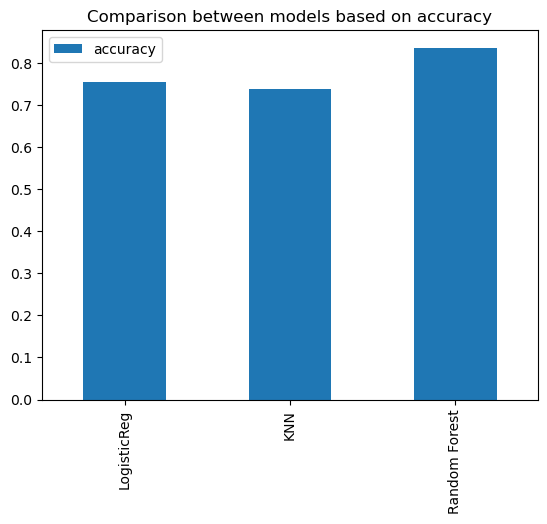

In [ ]:
pandas.DataFrame(mdlcmprsn,index=['accuracy']).T.plot.bar()
matplotlib.pyplot.title('Comparison between models based on accuracy');

## Tuning Models

### Tuning KNN

In [ ]:
trainScores = []
testScores = []

# Different values for n_neighbors
neighbors = range(1,21)

# KNN instance
knn = KNeighborsClassifier()

# Looping through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    knn.fit(xtrain,ytrain)

    trainScores.append(knn.score(xtrain,ytrain))
    testScores.append(knn.score(xtest,ytest))    

The highest score KNN could achieve within the range of 1 to 21 was 80.33


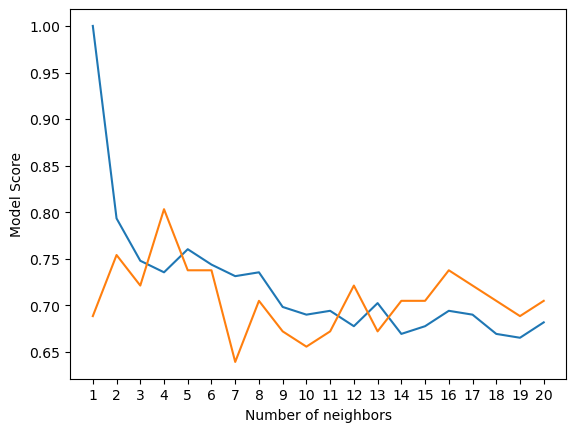

In [ ]:
matplotlib.pyplot.plot(neighbors,trainScores,label='Train Score')
matplotlib.pyplot.plot(neighbors,testScores,label='Test Score')
matplotlib.pyplot.legend()
matplotlib.pyplot.xticks(numpy.arange(1,21))
matplotlib.pyplot.xlabel("Number of neighbors")
matplotlib.pyplot.ylabel("Model Score")
# matplotlib.pyplot.legend()

print(f'The highest score KNN could achieve within the range of 1 to 21 was {max(testScores)*100:.2f}')

### Tuning with RSCV

- We are going to tune the other two models using `RandomizedSearchCV`

In [ ]:
# Define hyperparameter grid for LogisticRegression
logRegGrid = {
          "C": numpy.logspace(-4,4,20)
         ,"solver": ['liblinear']
         }

# Define hyperparameter grid for RandomForestClassifier
rfGrids = {
           "n_estimators": numpy.arange(10,1000,50)
          ,"max_depth": [None,3,5,10]
          ,"min_samples_split":numpy.arange(2,20,2)
          ,"min_samples_leaf": numpy.arange(1,20,2)
          }

In [ ]:
# Tune logistic Regression
# Setup random hyperparameter search for LogisticRegression
rsLogReg = RandomizedSearchCV(LogisticRegression()
                             ,param_distributions=logRegGrid
                             ,cv=5
                             ,n_iter=20
                             ,verbose=True)
# Fit random hyperparameter search model for LR
rsLogReg.fit(xtrain,ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rsLogReg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [ ]:
rsLogReg.score(xtest,ytest)

0.8032786885245902

In [ ]:
# Tune RandomForestClassifier
# Setup random hyperparameter search for RandomForestClassifier
rsRF = RandomizedSearchCV(RandomForestClassifier()
                             ,param_distributions=rfGrids
                             ,cv=5
                             ,n_iter=20
                             ,verbose=True)
# Fit random hyperparameter search model for LR
rsRF.fit(xtrain,ytrain)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rsRF.best_params_

{'n_estimators': 810,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_depth': 3}

In [ ]:
rsRF.score(xtest,ytest)

0.8032786885245902

### Tuning with GridSearchCV

- We are going to tune LogisticRegression model using `GSCV`

In [ ]:
# Define hyperparameter grid for LogisticRegression
logRegGrid = {
          "C": numpy.logspace(-4,4,30)
         ,"solver": ['liblinear']
         }
# Setup grid hyperparameter search for LogisticRegression
gsLogReg = GridSearchCV(
     LogisticRegression()
    ,param_grid=logRegGrid
    ,cv=5
    ,verbose=True
)

gsLogReg.fit(xtrain,ytrain)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
gsLogReg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [ ]:
gsLogReg.score(xtest,ytest)

0.8032786885245902

## Evaluation

In [ ]:
# Evaluating tuned models based on metrics other than accuracy
yPred = gsLogReg.predict(xtest)

### ROC

/home/thlurte/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


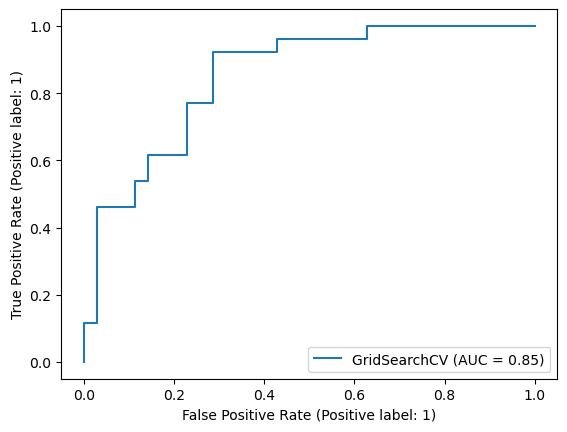

In [ ]:
plot_roc_curve(gsLogReg,xtest,ytest);

### Confusion Matrix

In [ ]:
confusion_matrix(ytest,yPred)

array([[25, 10],
       [ 2, 24]])

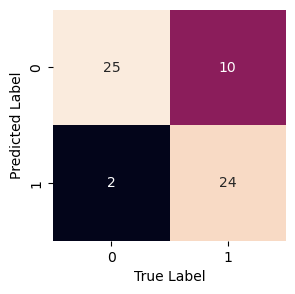

In [ ]:
fig,ax = matplotlib.pyplot.subplots(figsize=(3,3))
ax = seaborn.heatmap(
     confusion_matrix(ytest,yPred)
    ,annot=True
    ,cbar=False
)

matplotlib.pyplot.xlabel('True Label')
matplotlib.pyplot.ylabel('Predicted Label');

### Classification Report

In [ ]:
print(classification_report(ytest,yPred))

              precision    recall  f1-score   support

           0       0.93      0.71      0.81        35
           1       0.71      0.92      0.80        26

    accuracy                           0.80        61
   macro avg       0.82      0.82      0.80        61
weighted avg       0.83      0.80      0.80        61



### Cross-Validation

#### Cross-Valiated Accuracy

In [ ]:
cross_val_score(gsLogReg,X,y,cv=5,scoring='accuracy')

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


array([0.81967213, 0.90163934, 0.86885246, 0.86666667, 0.75      ])

In [ ]:
cvA = numpy.mean(cross_val_score(gsLogReg,X,y,cv=5,scoring='accuracy',verbose=False))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


#### Cross-Valiated Precision

In [ ]:
cross_val_score(gsLogReg,X,y,cv=5,scoring='precision')

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


array([0.775     , 0.88571429, 0.85714286, 0.85714286, 0.725     ])

In [ ]:
cvP = numpy.mean(cross_val_score(gsLogReg,X,y,cv=5,scoring='precision'))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


#### Cross-Validated Recall

In [ ]:
cross_val_score(gsLogReg,X,y,cv=5,scoring='recall')

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


array([0.93939394, 0.93939394, 0.90909091, 0.90909091, 0.87878788])

In [ ]:
cvR = numpy.mean(cross_val_score(gsLogReg,X,y,cv=5,scoring='recall'))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


#### Cross-Validated f1-score

In [ ]:
cross_val_score(gsLogReg,X,y,cv=5,scoring='f1')

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


array([0.84931507, 0.91176471, 0.88235294, 0.88235294, 0.79452055])

In [ ]:
cvF1 = numpy.mean(cross_val_score(gsLogReg,X,y,cv=5,scoring='f1'))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits


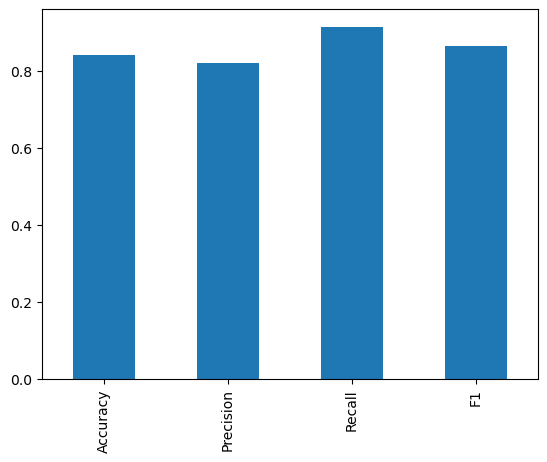

In [ ]:
cvMetrics = pandas.DataFrame({
     "Accuracy": cvA
    ,"Precision": cvP
    ,"Recall": cvR
    ,"F1": cvF1
            },index=[0])
cvMetrics.T.plot.bar(legend=False);

## Feature Importance

Let's find which character contributed most to the outcomes of the model that performed better than others.

In [ ]:
gsLogReg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [ ]:
clf = LogisticRegression(
    C=0.1082636733874054
    ,solver='liblinear')
clf.fit(xtrain,ytrain)

LogisticRegression(C=0.1082636733874054, solver='liblinear')

In [ ]:
feature = dict(zip(rawData.columns,list(clf.coef_[0])))

In [ ]:
feature

{'age': 0.014109398446225482,
 'sex': -0.5393959069570461,
 'cp': 0.7532222540827109,
 'trestbps': -0.021047872761588742,
 'chol': 0.0005620711492136896,
 'fbs': 0.03477318236845954,
 'restecg': 0.2609539780821631,
 'thalach': 0.023186626062637328,
 'exang': -0.4499769257093606,
 'oldpeak': -0.4341577763684808,
 'slope': 0.3982516505631942,
 'ca': -0.6290140043861331,
 'thal': -0.5897629391893409}

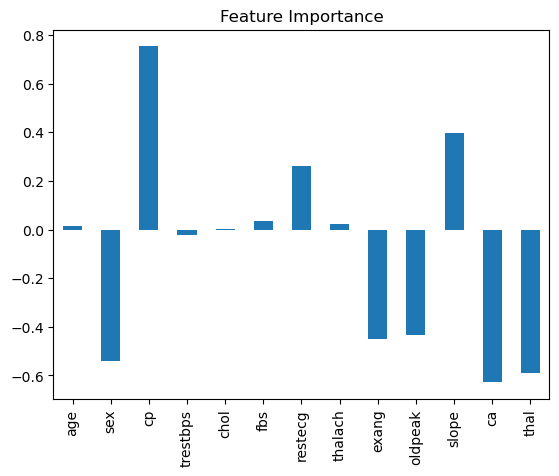

In [ ]:
pandas.DataFrame(feature,index=[0]).T.plot.bar(title="Feature Importance",legend=False);